In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from illustris_python import illustris_python as il
import time
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_22_10_28.parquet')
basePath = '/x/Physics/AstroPhysics/Shared-New/DATA/IllustrisTNG/TNG100-1/output'

objects_df['r1'] = np.NaN
objects_df['r1_id']
objects_df['r2']
objects_df['r2_id']

# For one snapshot...

    
def loadSnapNeighbours(snap):
    
    print('Loading header')
    header = il.groupcat.loadHeader(basePath, snap)
    box_size = header['BoxSize']

    # Load snapshot data
    print('Loading snapshot data')
    snapshot_data = il.groupcat.loadSubhalos(basePath, snap, fields=['SubhaloPos', 'SubhaloFlag', 'SubhaloMassType', 'SubhaloMassInHalfRadType'])
    
    print('creating dfs')
    gals = pd.DataFrame({'Flag': snapshot_data['SubhaloFlag'], 'Mstellar' :snapshot_data['SubhaloMassType'][:, 4], 'HMRad' : snapshot_data['SubhaloMassInHalfRadType'][:, 4]})
    gals['pos_x'] = ''
    gals['pos_y'] = ''
    gals['pos_z'] = ''
    gals['pos_x'] = snapshot_data['SubhaloPos'][:,0]
    gals['pos_y'] = snapshot_data['SubhaloPos'][:,1]
    gals['pos_z'] = snapshot_data['SubhaloPos'][:,2]
    print(snapshot_data['SubhaloPos'])
    print(gals)
    gals = gals.loc[(gals['Flag'] == True) & (gals['Mstellar'] > 0.001) & (gals['HMRad'] > 0)]
    print(gals)
    
    positions = np.array([gals['pos_x'].values, gals['pos_y'].values, gals['pos_z'].values])
    positions = np.transpose(positions)
    print(positions)
    
    # For each subhalo in the object df in that snapshot
    subhalos = objects_df.loc[(objects_df['SnapNum'] == snap) & (objects_df['Mstellar'] > 0.1)]['SFID'].values
    print(subhalos)
    
    for i, subhalo in enumerate(subhalos[:10]):
        
        if (i%100 == 0):
            print('Subhalo ',i,'/',len(subhalos))
    
        # Find the nearest and second nearest neighbour and the subhalo id
        subhalo_data = il.groupcat.loadSingle(basePath, snap, subhaloID=subhalo)
        r = subhalo_data['SubhaloPos']
        
        new_positions = positions - (r - np.array([box_size/2,box_size/2,box_size/2]))
        r = r - (r - np.array([box_size/2,box_size/2,box_size/2]))
        new_positions[new_positions>box_size] -= box_size
        new_positions[new_positions<0] += box_size
        sep = new_positions - r
        dist = np.sqrt((sep*sep).sum(axis=1))
        
        gals['dist'] = dist
        print(gals)
        
        snap_df = objects_df.loc[(objects_df['SnapNum'] == snap)]
        
        neighbours = gals.loc[(gals['Flag'] == True) & (gals['Mstellar'] > 0) & (gals['dist'] > 0)].nsmallest(2,'dist')
        r1 = [np.min(neighbours['dist']), neighbours['dist'].idxmin()]
        r2 = [np.max(neighbours['dist']), neighbours['dist'].idxmax()]
        
        snap_df.loc[(objects_df['SnapNum'] == snap) & (objects_df['SFID'] == subhalo), 'r1'] = r1[0]
        snap_df.loc[(objects_df['SnapNum'] == snap) & (objects_df['SFID'] == subhalo), 'r1_id'] = r1[1]
        snap_df.loc[(objects_df['SnapNum'] == snap) & (objects_df['SFID'] == subhalo), 'r2'] = r2[0]
        snap_df.loc[(objects_df['SnapNum'] == snap) & (objects_df['SFID'] == subhalo), 'r2_id'] = r2[1]
        

KeyError: 'r1_id'

In [13]:
snap_dfs = {}

for snap in [28, 29, 30]:
    loadSnapNeighbours(snap)

Loading header
Loading snapshot data
creating dfs
[[11379.482  53354.76   47751.29  ]
 [11291.589  53399.715  47813.484 ]
 [10768.196  53510.402  47792.953 ]
 ...
 [69830.734  55350.273  38275.977 ]
 [68864.7     5578.3506 49332.344 ]
 [70737.89   38371.434  44925.246 ]]
         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250
...       ...        ...        ...           ...           ...           ...
5766169  True   0.000000   0.000000  68537.453125  15123.477539  52074.886719
5766170  True   0.000000   0.000000  69232.921875   2044.876099  24845.150391
5766171  True   0.000000  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062   
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375   
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125   
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906   
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250   
...       ...        ...        ...           ...           ...           ...   
1719102  True   0.001141   0.000522  24862.917969  30041.453125  40390.839844   
1731137  True   0.002014   0.000927  74081.375000  12908.270508  21017.427734   
1742583  True   0.001492   0.000706  25434.359375  36153.066406  44713.785156   
1862989  True   0.001594   0.000725  64319.128906   2765.488281  38649.144531   
2109122  True   0.002270   0.001037  24958.650391  37358.128906  45836.050781   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062   
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375   
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125   
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906   
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250   
...       ...        ...        ...           ...           ...           ...   
1719102  True   0.001141   0.000522  24862.917969  30041.453125  40390.839844   
1731137  True   0.002014   0.000927  74081.375000  12908.270508  21017.427734   
1742583  True   0.001492   0.000706  25434.359375  36153.066406  44713.785156   
1862989  True   0.001594   0.000725  64319.128906   2765.488281  38649.144531   
2109122  True   0.002270   0.001037  24958.650391  37358.128906  45836.050781   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062   
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375   
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125   
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906   
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250   
...       ...        ...        ...           ...           ...           ...   
1719102  True   0.001141   0.000522  24862.917969  30041.453125  40390.839844   
1731137  True   0.002014   0.000927  74081.375000  12908.270508  21017.427734   
1742583  True   0.001492   0.000706  25434.359375  36153.066406  44713.785156   
1862989  True   0.001594   0.000725  64319.128906   2765.488281  38649.144531   
2109122  True   0.002270   0.001037  24958.650391  37358.128906  45836.050781   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062   
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375   
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125   
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906   
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250   
...       ...        ...        ...           ...           ...           ...   
1719102  True   0.001141   0.000522  24862.917969  30041.453125  40390.839844   
1731137  True   0.002014   0.000927  74081.375000  12908.270508  21017.427734   
1742583  True   0.001492   0.000706  25434.359375  36153.066406  44713.785156   
1862989  True   0.001594   0.000725  64319.128906   2765.488281  38649.144531   
2109122  True   0.002270   0.001037  24958.650391  37358.128906  45836.050781   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  20.811342  10.405576  11379.482422  53354.761719  47751.289062   
1        True   9.343500   4.671709  11291.588867  53399.714844  47813.484375   
2        True   1.957095   0.978489  10768.196289  53510.402344  47792.953125   
3        True   8.222173   4.111022  11389.235352  53313.828125  47669.003906   
4        True   7.352870   3.676394  11417.740234  53327.082031  47647.531250   
...       ...        ...        ...           ...           ...           ...   
1719102  True   0.001141   0.000522  24862.917969  30041.453125  40390.839844   
1731137  True   0.002014   0.000927  74081.375000  12908.270508  21017.427734   
1742583  True   0.001492   0.000706  25434.359375  36153.066406  44713.785156   
1862989  True   0.001594   0.000725  64319.128906   2765.488281  38649.144531   
2109122  True   0.002270   0.001037  24958.650391  37358.128906  45836.050781   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  39.948666  19.974333  11356.485352  53237.148438  47724.613281   
1        True  11.682376   5.841115  11189.632812  53323.042969  47806.359375   
2        True   6.870203   3.435098  11407.177734  53212.523438  47691.441406   
3        True   0.835139   0.417484  11037.883789  52694.539062  47089.914062   
4        True   4.173245   2.086580  11636.702148  53091.089844  47514.218750   
...       ...        ...        ...           ...           ...           ...   
1803844  True   0.001176   0.000520  45677.355469  37844.605469  72278.414062   
1950755  True   0.001272   0.000582   8124.352539  50551.160156  43142.414062   
2129619  True   0.001576   0.000764  64307.507812   2767.911377  38688.359375   
2171391  True   0.001049   0.000501  71180.078125  57556.042969  38414.320312   
2222501  True   0.002289   0.001056  72194.171875  61522.023438  62820.179688   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  39.948666  19.974333  11356.485352  53237.148438  47724.613281   
1        True  11.682376   5.841115  11189.632812  53323.042969  47806.359375   
2        True   6.870203   3.435098  11407.177734  53212.523438  47691.441406   
3        True   0.835139   0.417484  11037.883789  52694.539062  47089.914062   
4        True   4.173245   2.086580  11636.702148  53091.089844  47514.218750   
...       ...        ...        ...           ...           ...           ...   
1803844  True   0.001176   0.000520  45677.355469  37844.605469  72278.414062   
1950755  True   0.001272   0.000582   8124.352539  50551.160156  43142.414062   
2129619  True   0.001576   0.000764  64307.507812   2767.911377  38688.359375   
2171391  True   0.001049   0.000501  71180.078125  57556.042969  38414.320312   
2222501  True   0.002289   0.001056  72194.171875  61522.023438  62820.179688   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  39.948666  19.974333  11356.485352  53237.148438  47724.613281   
1        True  11.682376   5.841115  11189.632812  53323.042969  47806.359375   
2        True   6.870203   3.435098  11407.177734  53212.523438  47691.441406   
3        True   0.835139   0.417484  11037.883789  52694.539062  47089.914062   
4        True   4.173245   2.086580  11636.702148  53091.089844  47514.218750   
...       ...        ...        ...           ...           ...           ...   
1803844  True   0.001176   0.000520  45677.355469  37844.605469  72278.414062   
1950755  True   0.001272   0.000582   8124.352539  50551.160156  43142.414062   
2129619  True   0.001576   0.000764  64307.507812   2767.911377  38688.359375   
2171391  True   0.001049   0.000501  71180.078125  57556.042969  38414.320312   
2222501  True   0.002289   0.001056  72194.171875  61522.023438  62820.179688   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Loading header
Loading snapshot data
creating dfs
[[11319.761  53155.83   47737.266 ]
 [11293.256  53182.91   47786.26  ]
 [11381.817  53132.242  47704.586 ]
 ...
 [69316.22    2161.0977 25036.732 ]
 [67693.4    14505.981  40850.953 ]
 [70076.     49342.617  45532.004 ]]
         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z
0        True  43.032661  21.516294  11319.760742  53155.828125  47737.265625
1        True  11.118352   5.559076  11293.255859  53182.910156  47786.261719
2        True   7.506901   3.753449  11381.817383  53132.242188  47704.585938
3        True   0.651632   0.325748  11928.124023  53108.000000  47144.171875
4        True   4.161002   2.080492  11536.286133  52783.621094  47483.917969
...       ...        ...        ...           ...           ...           ...
5708100  True   0.000000   0.000000  66972.156250  60727.375000  31527.087891
5708101  True   0.000000   0.000000  67998.242188   2223.390869  30483.675781
5708102  True   0.000000  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  43.032661  21.516294  11319.760742  53155.828125  47737.265625   
1        True  11.118352   5.559076  11293.255859  53182.910156  47786.261719   
2        True   7.506901   3.753449  11381.817383  53132.242188  47704.585938   
3        True   0.651632   0.325748  11928.124023  53108.000000  47144.171875   
4        True   4.161002   2.080492  11536.286133  52783.621094  47483.917969   
...       ...        ...        ...           ...           ...           ...   
2031240  True   0.002161   0.001014  53850.437500  71352.929688  15675.333008   
2246163  True   0.001039   0.000470  71148.578125  57625.160156  38439.242188   
2277762  True   0.001416   0.000599  64291.117188   2762.667236  38740.511719   
2284778  True   0.001343   0.000666  53130.578125  70235.617188  41214.433594   
2369715  True   0.001137   0.000526   8125.574707  50528.226562  43237.144531   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  43.032661  21.516294  11319.760742  53155.828125  47737.265625   
1        True  11.118352   5.559076  11293.255859  53182.910156  47786.261719   
2        True   7.506901   3.753449  11381.817383  53132.242188  47704.585938   
3        True   0.651632   0.325748  11928.124023  53108.000000  47144.171875   
4        True   4.161002   2.080492  11536.286133  52783.621094  47483.917969   
...       ...        ...        ...           ...           ...           ...   
2031240  True   0.002161   0.001014  53850.437500  71352.929688  15675.333008   
2246163  True   0.001039   0.000470  71148.578125  57625.160156  38439.242188   
2277762  True   0.001416   0.000599  64291.117188   2762.667236  38740.511719   
2284778  True   0.001343   0.000666  53130.578125  70235.617188  41214.433594   
2369715  True   0.001137   0.000526   8125.574707  50528.226562  43237.144531   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

         Flag   Mstellar      HMRad         pos_x         pos_y         pos_z  \
0        True  43.032661  21.516294  11319.760742  53155.828125  47737.265625   
1        True  11.118352   5.559076  11293.255859  53182.910156  47786.261719   
2        True   7.506901   3.753449  11381.817383  53132.242188  47704.585938   
3        True   0.651632   0.325748  11928.124023  53108.000000  47144.171875   
4        True   4.161002   2.080492  11536.286133  52783.621094  47483.917969   
...       ...        ...        ...           ...           ...           ...   
2031240  True   0.002161   0.001014  53850.437500  71352.929688  15675.333008   
2246163  True   0.001039   0.000470  71148.578125  57625.160156  38439.242188   
2277762  True   0.001416   0.000599  64291.117188   2762.667236  38740.511719   
2284778  True   0.001343   0.000666  53130.578125  70235.617188  41214.433594   
2369715  True   0.001137   0.000526   8125.574707  50528.226562  43237.144531   

                 dist  
0  

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [12]:
snap_dfs

{28:            SFID  SnapNum   Mstellar       MBH         MDM       Mgas  \
 71         7697       28  10.258378  0.043833  523.798218  61.335186   
 136        7721       28   0.023722  0.000000    0.521247   0.051986   
 143        7731       28   0.024211  0.000000    0.305367   0.000000   
 154        7739       28   0.013599  0.000000    0.247226   0.000000   
 176        7707       28   0.325536  0.000183    2.908569   0.456222   
 ...         ...      ...        ...       ...         ...        ...   
 3335225   60466       28   0.049878  0.000125    1.626433   0.277878   
 3335241   60467       28   0.010070  0.000000    0.723982   0.048935   
 3335251   13920       28   0.013041  0.000000    0.256832   0.025669   
 3335300  321755       28   0.023434  0.000093    3.673503   0.357636   
 3335309   70019       28   0.010324  0.000000    0.678481   0.055061   
 
                SFR         Z     HMRad     BHacc  ...  snap_recent  \
 71       51.693527  0.020290  1.527090  0.0006

In [27]:
test = pd.read_parquet(df_dir + 'objects_master_neighbours_22_12_13.parquet')

In [28]:
test


,SFID,SnapNum,Mstellar,MBH,MDM,Mgas,SFR,Z,HMRad,BHacc,...,snap_recent,ratio_biggest,dt_biggest,SFID_biggest,snap_biggest,Redshift,r1,r1_id,r2,r2_id
71,7697,28,10.258378,0.043833,523.798218,61.335186,51.693527,0.020290,1.527090,0.000663,...,22,0.160141,0.85,7979,22,2.58,67.400183,7706.0,115.318399,7731.0
136,7721,28,0.023722,0.000000,0.521247,0.051986,0.202759,0.005134,5.309861,0.000000,...,0,0.000000,0.00,0,0,2.58,NaN,NaN,NaN,NaN
143,7731,28,0.024211,0.000000,0.305367,0.000000,0.000000,0.000000,5.046043,0.000000,...,0,0.000000,0.00,0,0,2.58,NaN,NaN,NaN,NaN
154,7739,28,0.013599,0.000000,0.247226,0.000000,0.000000,0.000000,5.734598,0.000000,...,0,0.000000,0.00,0,0,2.58,NaN,NaN,NaN,NaN
176,7707,28,0.325536,0.000183,2.908569,0.456222,6.904796,0.017217,4.363657,0.000318,...,0,0.000000,0.00,0,0,2.58,75.934339,7728.0,102.401148,7745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335093,631279,50,0.015591,0.000096,1.826134,0.055296,0.026702,0.005632,3.150982,0.000007,...,0,0.000000,0.00,0,0,1.00,NaN,NaN,NaN,NaN
3335156,330759,50,0.010872,0.000000,0.854926,0.034683,0.008437,0.008110,2.728142,0.000000,...,0,0.000000,0.00,0,0,1.00,NaN,NaN,NaN,NaN
3335203,152755,50,0.024027,0.000000,0.105159,0.000000,0.000000,0.000000,2.512132,0.000000,...,0,0.000000,0.00,0,0,1.00,NaN,NaN,NaN,NaN
3335265,241346,50,0.012210,0.000000,0.245709,0.035564,0.039649,0.010043,2.812898,0.000000,...,0,0.000000,0.00,0,0,1.00,NaN,NaN,NaN,NaN


In [31]:
with_r1 = test.loc[test.r1 > 0]
with_r1['r1_Mstellar'] = np.NaN
with_r1['r1_HMRad'] = np.NaN
with_r1['r_sep'] = np.NaN

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [32]:
with_r1

,SFID,SnapNum,Mstellar,MBH,MDM,Mgas,SFR,Z,HMRad,BHacc,...,SFID_biggest,snap_biggest,Redshift,r1,r1_id,r2,r2_id,r1_Mstellar,r1_HMRad,r_sep
71,7697,28,10.258378,0.043833,523.798218,61.335186,51.693527,0.020290,1.527090,6.633166e-04,...,7979,22,2.58,67.400183,7706.0,115.318399,7731.0,NaN,NaN,NaN
176,7707,28,0.325536,0.000183,2.908569,0.456222,6.904796,0.017217,4.363657,3.176561e-04,...,0,0,2.58,75.934339,7728.0,102.401148,7745.0,NaN,NaN,NaN
231,7704,28,0.536915,0.000932,3.452061,1.031721,15.195048,0.017998,4.109957,3.192803e-03,...,0,0,2.58,48.811392,7791.0,53.132909,7777.0,NaN,NaN,NaN
336,7698,28,5.239740,0.033889,72.387619,4.960063,6.341863,0.030480,1.454485,2.579519e-04,...,0,0,2.58,117.198352,7739.0,157.663747,7711.0,NaN,NaN,NaN
395,7701,28,0.965379,0.001647,4.021843,1.904890,40.109142,0.019073,3.714257,1.511189e-03,...,0,0,2.58,74.926210,7777.0,81.802645,7803.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,22,50,4.033911,0.034377,4.265025,0.000000,0.000000,0.000000,2.111149,1.606808e-06,...,0,0,1.00,26.369283,0.0,54.904273,3527.0,NaN,NaN,NaN
974,3,50,20.886656,0.105742,118.199226,6.358243,29.396936,0.013560,18.216469,4.507839e-04,...,0,0,1.00,16.480068,453.0,20.352305,516.0,NaN,NaN,NaN
1254,29,50,3.272533,0.000243,1.552619,0.000840,0.000882,0.035358,1.792664,5.182533e-10,...,0,0,1.00,24.849984,76.0,63.163837,3.0,NaN,NaN,NaN
1447,11,50,6.249006,0.025978,22.570353,0.092863,0.173477,0.042562,6.786221,9.601530e-05,...,0,0,1.00,90.419113,603.0,97.164984,75.0,NaN,NaN,NaN


In [39]:
for i, row in with_r1.iterrows():
    snap = row.SnapNum
    sub_id = row.r1_id
    sub_info = il.groupcat.loadSingle(basePath, snap, subhaloID=sub_id)
    print(sub_info)
    row.r1_Mstellar = sub_info['Mstellar']
    with_r1.at[i, 'r1_Mstellar'] = sub_info['Mstellar']
    with_r1.at[i, 'r1_HMRad'] = sub_info['HMRad']
    with_r1.at[i, 'r_sep'] = row.r1 / (sub_info['HMRad'] + row.HMRad)

{'SubhaloPos': array([  234.33556, 30243.7    , 20950.432  ], dtype=float32), 'Mstellar': 0.78941464, 'HMRad': 0.39470044}
{'SubhaloPos': array([  337.99872, 30202.875  , 21101.262  ], dtype=float32), 'Mstellar': 0.004164683, 'HMRad': 0.0020283712}
{'SubhaloPos': array([  241.33337, 30094.574  , 20891.756  ], dtype=float32), 'Mstellar': 0.007696404, 'HMRad': 0.0037910293}
{'SubhaloPos': array([  165.54619, 30684.97   , 21688.725  ], dtype=float32), 'Mstellar': 0.013598852, 'HMRad': 0.0067814253}
{'SubhaloPos': array([  215.23105, 30122.094  , 20901.367  ], dtype=float32), 'Mstellar': 0.005095788, 'HMRad': 0.002512884}
{'SubhaloPos': array([  297.1948, 30257.658 , 20970.348 ], dtype=float32), 'Mstellar': 10.258378, 'HMRad': 5.1291695}
{'SubhaloPos': array([ 1060.4348, 31153.979 , 19818.838 ], dtype=float32), 'Mstellar': 0.39776817, 'HMRad': 0.19881314}
{'SubhaloPos': array([ 1059.3312, 31149.104 , 19799.018 ], dtype=float32), 'Mstellar': 4.876184, 'HMRad': 2.4380555}
{'SubhaloPos': arra

In [40]:
with_r1

,SFID,SnapNum,Mstellar,MBH,MDM,Mgas,SFR,Z,HMRad,BHacc,...,SFID_biggest,snap_biggest,Redshift,r1,r1_id,r2,r2_id,r1_Mstellar,r1_HMRad,r_sep
71,7697,28,10.258378,0.043833,523.798218,61.335186,51.693527,0.020290,1.527090,0.000663,...,7979,22,2.58,67.4002,7706,115.318,7731,0.789415,0.3947,35.0716
176,7707,28,0.325536,0.000183,2.908569,0.456222,6.904796,0.017217,4.363657,0.000318,...,0,0,2.58,75.9343,7728,102.401,7745,0.00416468,0.00202837,17.3935
231,7704,28,0.536915,0.000932,3.452061,1.031721,15.195048,0.017998,4.109957,0.003193,...,0,0,2.58,48.8114,7791,53.1329,7777,0.0076964,0.00379103,11.8654
336,7698,28,5.239740,0.033889,72.387619,4.960063,6.341863,0.030480,1.454485,0.000258,...,0,0,2.58,117.198,7739,157.664,7711,0.0135989,0.00678143,80.2033
395,7701,28,0.965379,0.001647,4.021843,1.904890,40.109142,0.019073,3.714257,0.001511,...,0,0,2.58,74.9262,7777,81.8026,7803,0.00509579,0.00251288,20.159
643,7706,28,0.789415,0.002326,2.119873,0.499048,10.977402,0.025661,3.037749,0.001777,...,0,0,2.58,67.4002,7697,100.594,7731,10.2584,5.12917,8.25283
758,42002,28,4.876184,0.008384,146.455261,19.918034,116.186600,0.017193,5.854996,0.020773,...,0,0,2.58,20.4409,42004,38.5137,42031,0.397768,0.198813,3.37653
791,42004,28,0.397768,0.001123,0.559671,0.273353,9.735437,0.023100,2.458961,0.002994,...,0,0,2.58,20.4409,42002,25.0266,42031,4.87618,2.43806,4.17414
811,42003,28,0.391404,0.000000,1.091029,0.256999,9.899740,0.024550,3.206430,0.000000,...,0,0,2.58,102.002,42031,103.106,42004,0.00299964,0.00148493,31.797
856,39187,28,3.713119,0.008480,123.773689,17.483688,52.921543,0.019414,11.016972,0.018978,...,0,0,2.58,27.9349,39198,121.889,39209,0.0437761,0.0218682,2.5306


,SFID,SnapNum,Mstellar,MBH,MDM,Mgas,SFR,Z,HMRad,BHacc,...,snap_recent,ratio_biggest,dt_biggest,SFID_biggest,snap_biggest,Redshift,r1,r1_id,r2,r2_id
74,7096,25,9.231916,0.043279,263.338470,26.633814,15.555920,0.039073,1.227355,0.000134,...,22,0.160141,0.456,7979,22,3.01,83.3598,382124,92.6309,3550059
179,7101,25,0.153959,0.000139,4.874747,0.885067,12.217182,0.006811,5.551935,0.000185,...,0,0.000000,0.000,0,0,3.01,137.714,3206507,145.555,1534316
234,7099,25,0.303488,0.000396,12.380504,1.942441,15.949830,0.010930,3.708337,0.002598,...,0,0.000000,0.000,0,0,3.01,189.302,3140297,301.098,4345896
339,31476,25,4.989180,0.033846,111.177811,8.786542,7.965131,0.019410,1.340033,0.001844,...,0,0.000000,0.000,0,0,3.01,451.591,4722149,463.373,1702215
398,7097,25,0.597057,0.001052,24.107805,4.085263,15.502904,0.018868,4.144800,0.001508,...,0,0.000000,0.000,0,0,3.01,447.812,4928734,525.54,5342638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510367,160905,25,0.206996,0.000210,9.239876,1.796473,6.862883,0.009842,3.567893,0.000681,...,0,0.000000,0.000,0,0,3.01,285.235,2143338,289.748,1107163
510424,146776,25,0.173486,0.000124,12.536221,2.204306,5.614544,0.007902,6.641895,0.000130,...,0,0.000000,0.000,0,0,3.01,375.574,992859,391.217,992860
510567,87027,25,0.524404,0.000435,34.540836,4.885069,14.813420,0.013992,7.751017,0.001563,...,25,0.197987,0.000,87027,25,3.01,245.505,2611923,307.23,5036283
510806,160750,25,0.213405,0.000238,11.660060,1.809662,5.885459,0.011744,4.131463,0.000822,...,0,0.000000,0.000,0,0,3.01,382.66,3658784,413.016,969366


In [32]:
subhalo_data_99 = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloPos', 'SubhaloFlag', 'SubhaloMassType'])
print(subhalo_data_99)

{'count': 4371211, 'SubhaloPos': array([[  849.09143 , 26326.996   , 18306.934   ],
       [  106.473335, 24633.322   , 16900.553   ],
       [  853.11237 , 26725.748   , 17510.68    ],
       ...,
       [70013.06    , 20824.584   , 70093.69    ],
       [71621.484   , 23869.992   , 51625.562   ],
       [71024.98    , 23053.      , 52052.715   ]], dtype=float32), 'SubhaloFlag': array([ True,  True,  True, ...,  True,  True,  True]), 'SubhaloMassType': array([[3.9005981e+03, 2.3325619e+04, 0.0000000e+00, 0.0000000e+00,
        2.5101631e+02, 7.0181096e-01],
       [4.4455853e+02, 3.1840862e+03, 0.0000000e+00, 0.0000000e+00,
        3.7852551e+01, 1.2556633e-01],
       [1.2611633e+01, 7.1818396e+02, 0.0000000e+00, 0.0000000e+00,
        4.2482437e+01, 1.7748705e-01],
       ...,
       [0.0000000e+00, 1.5167229e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.4661655e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+

In [34]:
flags = subhalo_data_99['SubhaloFlag']
len(flags[flags == False])

10181

In [35]:
#data = np.array([subhalo_data_99['SubhaloPos'], subhalo_data_99['SubhaloFlag'], subhalo_data_99['SubhaloMassType'][4]])
positions = subhalo_data_99['SubhaloPos']
subhalos = pd.DataFrame(subhalo_data_99['SubhaloFlag'], columns = ['Flag'])

In [50]:
subhalos['dist'][96]

32.832281425618994

In [46]:
np.min(subhalos.loc[(subhalos['Flag'] == True) & (subhalos['dist'] > 0)]['dist'])

32.832281425618994

In [58]:
neighbours = subhalos.loc[(subhalos['Flag'] == True) & (subhalos['dist'] > 0)].nsmallest(2,'dist')

In [64]:
neighbours['dist'].idxmax()

1553

In [63]:
subhalos.loc[(subhalos['Flag'] == True) & (subhalos['dist'] > 0)]['dist'].idxmax()

1153747

In [173]:
subhalo_data = il.groupcat.loadSingle(basePath, 99, subhaloID=768819)

In [174]:
subhalo_data

{'SubhaloPos': array([36158.207, 74774.945, 70913.055], dtype=float32),
 'Mstellar': 0.1150434}

In [172]:
subhalo_data_99['SubhaloMassType'][768819][4]

0.1150434

In [154]:
subhalo_data_99['SubhaloFlag']

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
start = time.time()
subhalo_data = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
r = subhalo_data['SubhaloPos']
header = il.groupcat.loadHeader(basePath, 99)
box_size = header['BoxSize']
positions = positions - (r - np.array([box_size/2,box_size/2,box_size/2]))
r = r - (r - np.array([box_size/2,box_size/2,box_size/2]))
positions[positions>box_size] -= box_size
positions[positions<0] += box_size
sep = positions - r
dist = np.sqrt((sep*sep).sum(axis=1))
print(np.min(dist[dist>0]))
print(time.time() - start)

6.287567984962826
0.4400770664215088


In [84]:
for i in range(28,51):
    print(i)

28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [133]:
r = subhalo_data['SubhaloPos']
print(r)

[  849.09143 26326.996   18306.934  ]


In [134]:
header = il.groupcat.loadHeader(basePath, 99)
box_size = header['BoxSize']

In [135]:
subhalo_data_99 = subhalo_data_99 - (r - np.array([box_size/2,box_size/2,box_size/2]))
r = r - (r - np.array([box_size/2,box_size/2,box_size/2]))

In [136]:
subhalo_data_99[subhalo_data_99>box_size] -= box_size
subhalo_data_99[subhalo_data_99<0] += box_size


In [140]:
sep = subhalo_data_99 - r

In [142]:
dist = np.sqrt((sep*sep).sum(axis=1))

In [144]:
np.min(dist[dist>0])

6.287567984962826

In [91]:
dist = np.sqrt((sep*sep).sum(axis=1))
print(np.min(dist[dist>0]))

#x = x' - (value - length/2)


19.3438


In [ ]:
# x = x' - (value - length/2)

In [40]:
248962 * 25.4/60

105393.91333333333

In [43]:
248962 * 25.4/60/60/24/12

6.099184799382716

[[0.58964092 1.64934433 2.91449892]
 [7.07210221 5.71389276 9.52714811]
 [9.72447367 3.26760828 3.12828771]
 [9.751277   7.89660879 8.12608674]]


(0.0, 10.0)

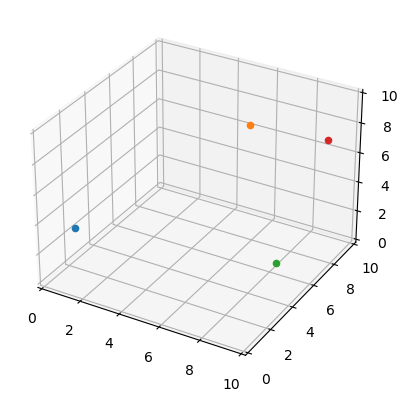

In [111]:
#r1 = [np.randint(, 1, 1]
#r2 = [5, 5, 5]
#r3 = [9, 9 ,9]
#r4 = [7, 7, 7]
#rs = np.array([r1, r2, r3, r4])
rs = np.random.rand(4,3) * 10
print(rs)

fig = plt.figure()
ax = plt.axes(projection='3d')
for r in rs:
    ax.scatter3D(r[0],r[1],r[2])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)

[[ 5.          5.          5.        ]
 [11.48246129  9.06454843 11.61264918]
 [14.13483275  6.61826395  5.21378878]
 [14.16163608 11.24726446 10.21158781]]


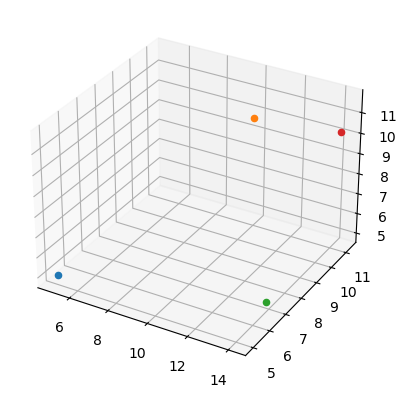

In [112]:
rs = rs - (rs[0]- np.array([5,5,5]))
print(rs)

fig = plt.figure()
ax = plt.axes(projection='3d')
for r in rs:
    ax.scatter3D(r[0],r[1],r[2])




[[5.         5.         5.        ]
 [1.48246129 9.06454843 1.61264918]
 [4.13483275 6.61826395 5.21378878]
 [4.16163608 1.24726446 0.21158781]]


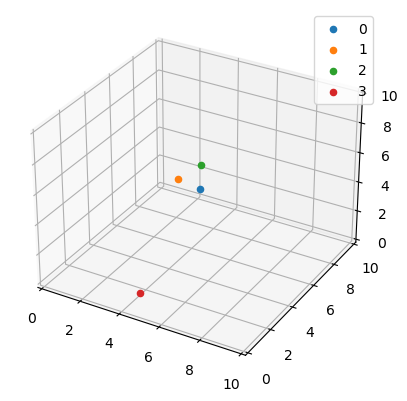

In [115]:
rs[rs>10] -= 10
rs[rs<0] += 10

print(rs)
fig = plt.figure()
ax = plt.axes(projection='3d')
for i, r in enumerate(rs):
    ax.scatter3D(r[0],r[1],r[2], label = i)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.legend()

In [81]:
print(rs)

[[9 9 9]
 [3 3 3]
 [7 7 7]
 [5 5 5]]
